Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51199 entries, 0 to 51198
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51199 non-null  object 
 1   MinTemp        50959 non-null  float64
 2   MaxTemp        51085 non-null  float64
 3   Rainfall       50667 non-null  float64
 4   Evaporation    29227 non-null  float64
 5   Sunshine       26720 non-null  float64
 6   WindGustDir    47878 non-null  object 
 7   WindGustSpeed  47901 non-null  float64
 8   WindDir9am     47564 non-null  object 
 9   WindDir3pm     49795 non-null  object 
 10  WindSpeed9am   50695 non-null  float64
 11  WindSpeed3pm   50199 non-null  float64
 12  Humidity9am    50531 non-null  float64
 13  Humidity3pm    49840 non-null  float64
 14  Pressure9am    46138 non-null  float64
 15  Pressure3pm    46136 non-null  float64
 16  Cloud9am       31795 non-null  float64
 17  Cloud3pm       30551 non-null  float64


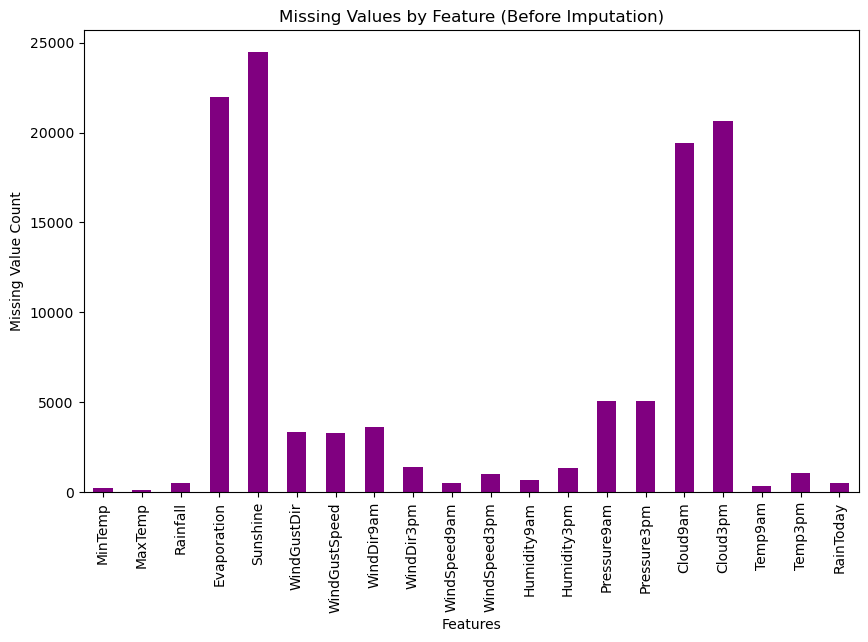

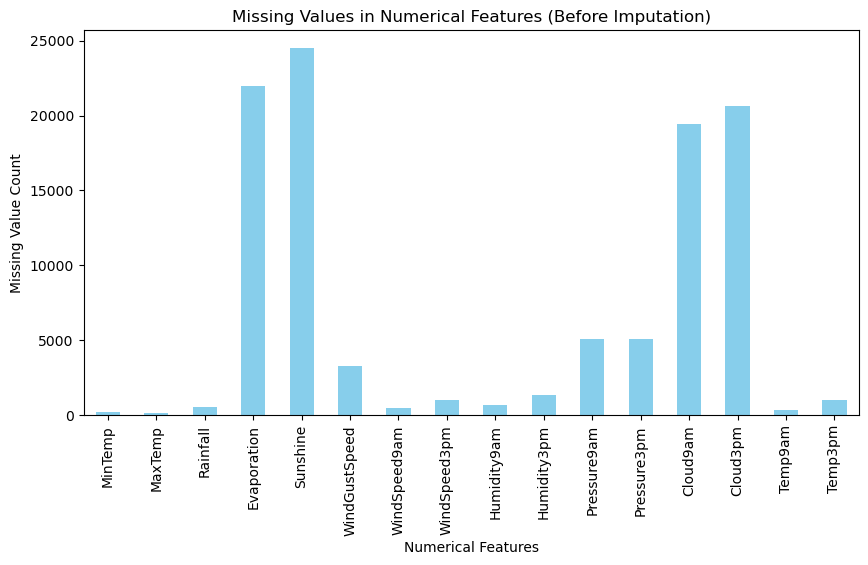

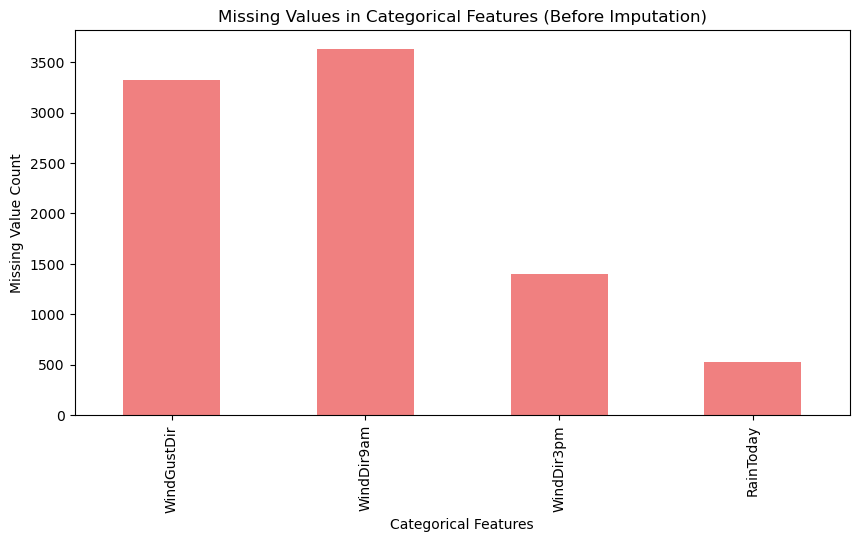


Total missing values after processing: 0

Data Info After Imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51199 entries, 0 to 51198
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51199 non-null  object 
 1   MinTemp        51199 non-null  float64
 2   MaxTemp        51199 non-null  float64
 3   Rainfall       51199 non-null  float64
 4   Evaporation    51199 non-null  float64
 5   Sunshine       51199 non-null  float64
 6   WindGustDir    51199 non-null  object 
 7   WindGustSpeed  51199 non-null  float64
 8   WindDir9am     51199 non-null  object 
 9   WindDir3pm     51199 non-null  object 
 10  WindSpeed9am   51199 non-null  float64
 11  WindSpeed3pm   51199 non-null  float64
 12  Humidity9am    51199 non-null  float64
 13  Humidity3pm    51199 non-null  float64
 14  Pressure9am    51199 non-null  float64
 15  Pressure3pm    51199 non-null  float64
 16  Cloud9am       51199 no

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ======================
# Step 0: Load Data
# ======================
data = pd.read_csv("Assignment3-WeatherData.csv")

# 데이터 기본 정보 확인
print("Data Info:")
print(data.info())
print("\nData Description:")
print(data.describe())

# ======================
# Step 1: Visualize Missing Values (Before Imputation)
# ======================

# 각 열별 결측치 개수 계산
missing_data_count = data.isnull().sum()
missing_data_count = missing_data_count[missing_data_count > 0]

# 전체 결측치 개수 시각화 (처리 전)
if not missing_data_count.empty:
    plt.figure(figsize=(10, 6))
    missing_data_count.plot(kind='bar', color='purple')
    plt.title('Missing Values by Feature (Before Imputation)')
    plt.xlabel('Features')
    plt.ylabel('Missing Value Count')
    plt.show()
else:
    print("No missing values in any feature before imputation.")

# 수치형 데이터의 결측치 개수 시각화 (처리 전)
numerical_missing = data.select_dtypes(include=['float64', 'int64']).isnull().sum()
numerical_missing = numerical_missing[numerical_missing > 0]

if not numerical_missing.empty:
    plt.figure(figsize=(10, 5))
    numerical_missing.plot(kind='bar', color='skyblue')
    plt.title('Missing Values in Numerical Features (Before Imputation)')
    plt.xlabel('Numerical Features')
    plt.ylabel('Missing Value Count')
    plt.show()
else:
    print("No missing values in numerical features before imputation.")

# 범주형 데이터의 결측치 개수 시각화 (처리 전)
categorical_missing = data.select_dtypes(include=['object']).isnull().sum()
categorical_missing = categorical_missing[categorical_missing > 0]

if not categorical_missing.empty:
    plt.figure(figsize=(10, 5))
    categorical_missing.plot(kind='bar', color='lightcoral')
    plt.title('Missing Values in Categorical Features (Before Imputation)')
    plt.xlabel('Categorical Features')
    plt.ylabel('Missing Value Count')
    plt.show()
else:
    print("No missing values in categorical features before imputation.")

# ======================
# Step 2: Handle Missing Values
# ======================

# 수치형 데이터: 중앙값으로 결측치 대체
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# 범주형 데이터: 최빈값으로 결측치 대체
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# ======================
# Step 3: Verify Missing Values After Imputation
# ======================

# 결측치가 모두 처리되었는지 확인
total_missing = data.isnull().sum().sum()
print("\nTotal missing values after processing:", total_missing)

# 각 속성의 결측치가 제대로 대체되었는지 데이터 정보 확인
print("\nData Info After Imputation:")
print(data.info())

# ======================
# Step 4: Visualize Missing Values After Imputation (Optional)
# ======================

# 수치형 데이터의 결측치 개수 시각화 (처리 후)
numerical_missing_after = data.select_dtypes(include=['float64', 'int64']).isnull().sum()
numerical_missing_after = numerical_missing_after[numerical_missing_after > 0]

if not numerical_missing_after.empty:
    plt.figure(figsize=(10, 5))
    numerical_missing_after.plot(kind='bar', color='skyblue')
    plt.title('Missing Values in Numerical Features (After Imputation)')
    plt.xlabel('Numerical Features')
    plt.ylabel('Missing Value Count')
    plt.show()
else:
    print("No missing values in numerical features after imputation.")

# 범주형 데이터의 결측치 개수 시각화 (처리 후)
categorical_missing_after = data.select_dtypes(include=['object']).isnull().sum()
categorical_missing_after = categorical_missing_after[categorical_missing_after > 0]

if not categorical_missing_after.empty:
    plt.figure(figsize=(10, 5))
    categorical_missing_after.plot(kind='bar', color='lightcoral')
    plt.title('Missing Values in Categorical Features (After Imputation)')
    plt.xlabel('Categorical Features')
    plt.ylabel('Missing Value Count')
    plt.show()
else:
    print("No missing values in categorical features after imputation.")


Relevant features based on correlation threshold:
 RainTomorrow     1.000000
Humidity3pm      0.440245
Cloud3pm         0.298504
Humidity9am      0.251942
Cloud9am         0.251425
Rainfall         0.244197
WindGustSpeed    0.226151
MaxTemp         -0.158367
Temp3pm         -0.189931
Pressure3pm     -0.216370
Pressure9am     -0.234999
Sunshine        -0.320903
Name: RainTomorrow, dtype: float64


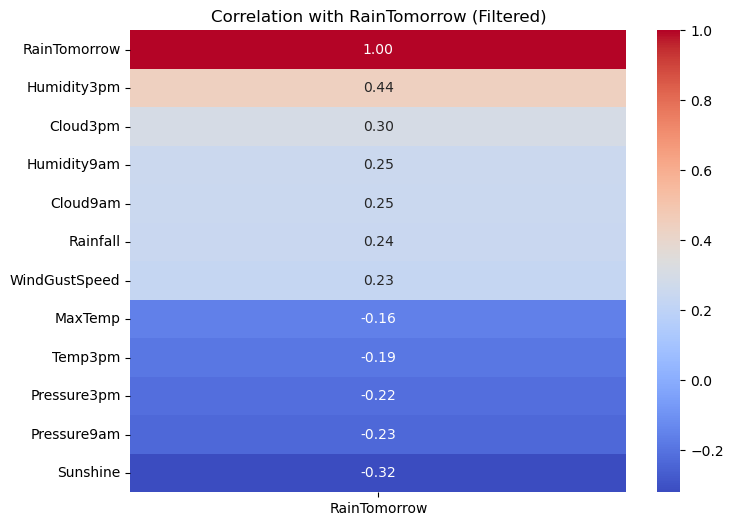

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# ======================
# Step 3: Correlation Analysis and Feature Selection
# ======================

# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical features
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Filter for correlations with RainTomorrow above a certain threshold
threshold = 0.1
relevant_features = correlation_matrix['RainTomorrow'][
    correlation_matrix['RainTomorrow'].abs() > threshold
].sort_values(ascending=False)

# Display the filtered correlations
print("Relevant features based on correlation threshold:\n", relevant_features)

# Visualize the relevant correlations as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(relevant_features.to_frame(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation with RainTomorrow (Filtered)")
plt.show()


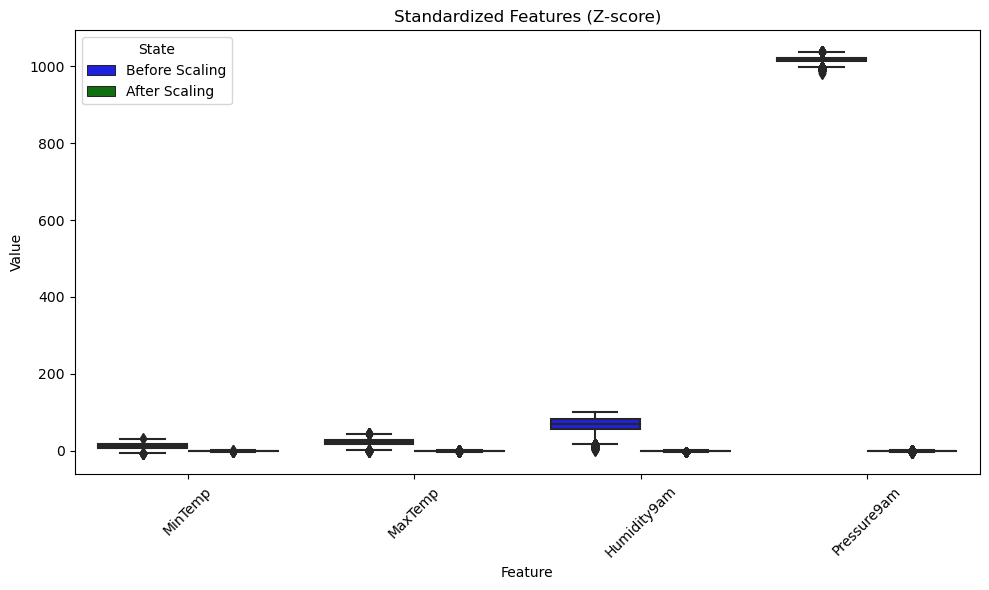

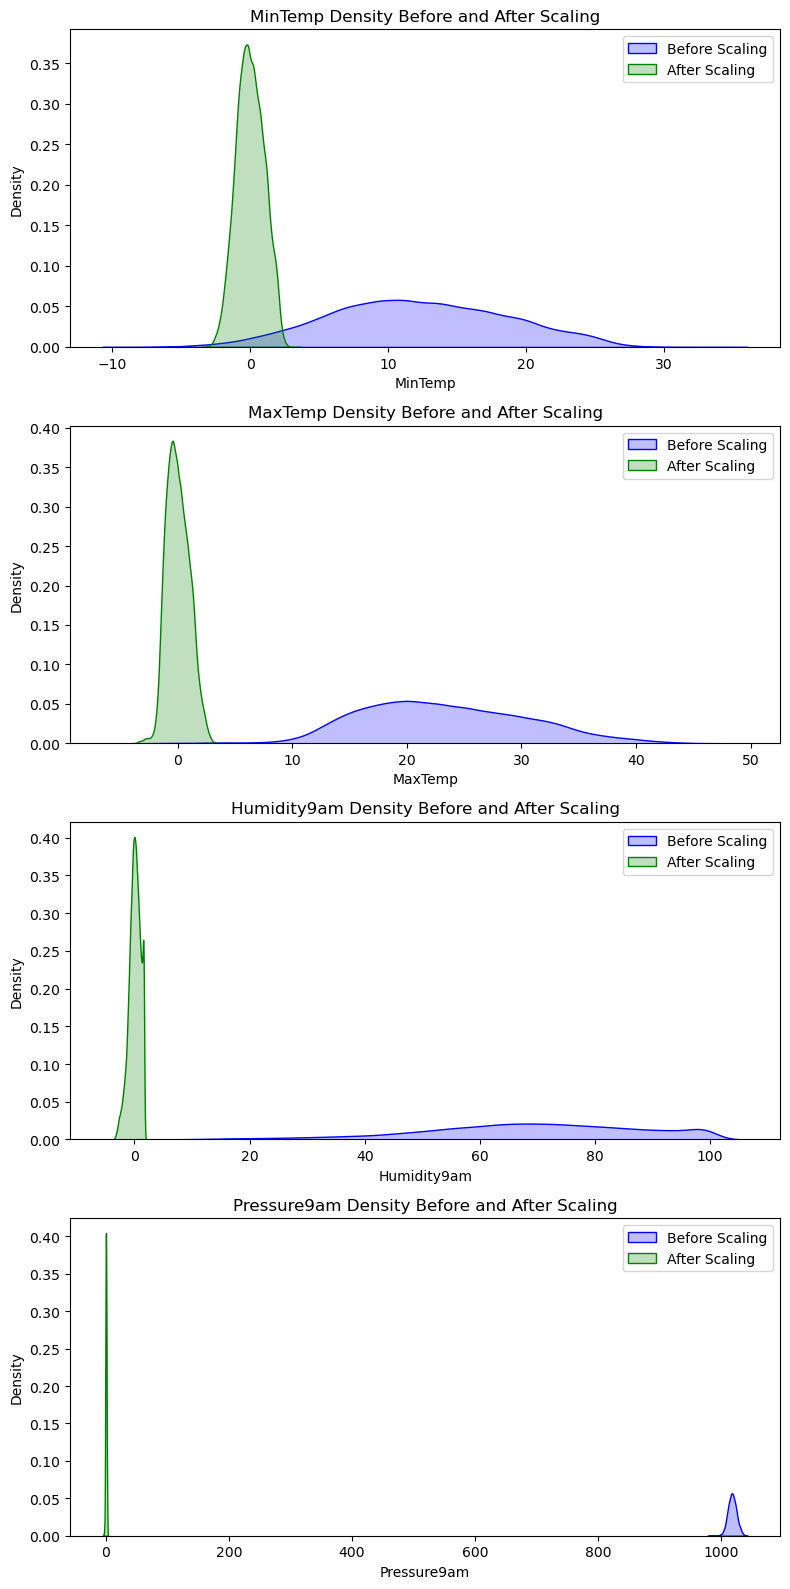

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ======================
# Step 0: Load Data
# ======================
data = pd.read_csv("Assignment3-WeatherData.csv")

# Preserve the original numerical data for comparison
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_before_scaling = data[numerical_cols].copy()

# ======================
# Step 1: Scaling with Z-score Standardization
# ======================
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# ======================
# Step 2: Boxplots for Key Features
# ======================
key_features = ['MinTemp', 'MaxTemp', 'Humidity9am', 'Pressure9am']
scaled_data = data[key_features]
before_after = pd.concat([
    data_before_scaling[key_features].assign(State='Before Scaling'),
    scaled_data.assign(State='After Scaling')
])

melted_data = before_after.melt(id_vars='State', var_name='Feature', value_name='Value')

# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_data, x='Feature', y='Value', hue='State', palette=['blue', 'green'])
plt.title('Standardized Features (Z-score)')
plt.xticks(rotation=45)
plt.legend(title="State")
plt.tight_layout()
plt.savefig("boxplots_scaling.png")  # Save for the report
plt.show()

# ======================
# Step 3: Density Plots for Key Features
# ======================
fig, axes = plt.subplots(len(key_features), 1, figsize=(8, 4 * len(key_features)))


for i, col in enumerate(key_features):
    sns.kdeplot(data_before_scaling[col], ax=axes[i], label='Before Scaling', color='blue', fill=True)
    sns.kdeplot(data[col], ax=axes[i], label='After Scaling', color='green', fill=True)
    axes[i].set_title(f"{col} Density Before and After Scaling")
    axes[i].legend()

plt.tight_layout()
plt.savefig("density_plots_scaling.png")  # Save for the report
plt.show()


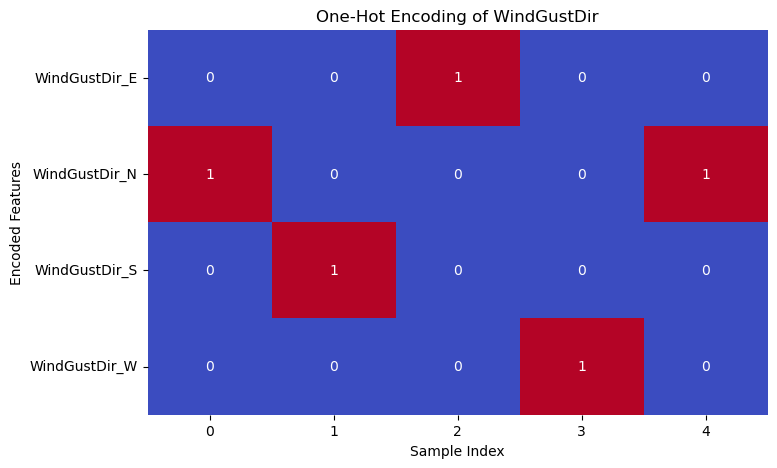

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset (replace this with your full dataset for actual use)
data = pd.DataFrame({
    'WindGustDir': ['N', 'S', 'E', 'W', 'N', 'E', 'S', 'W']
})

# Apply one-hot encoding to the WindGustDir column
data_encoded = pd.get_dummies(data, columns=['WindGustDir'], prefix='WindGustDir')

# Visualize a subset of the encoded data for clarity
sample_indices = [0, 1, 2, 3, 4]  # Select first 5 rows
data_encoded_subset = data_encoded.iloc[sample_indices]

# Plot the heatmap for the one-hot encoded values
plt.figure(figsize=(8, 5))
sns.heatmap(data_encoded_subset.T, annot=True, cmap="coolwarm", cbar=False)
plt.title("One-Hot Encoding of WindGustDir")
plt.xlabel("Sample Index")
plt.ylabel("Encoded Features")
plt.show()


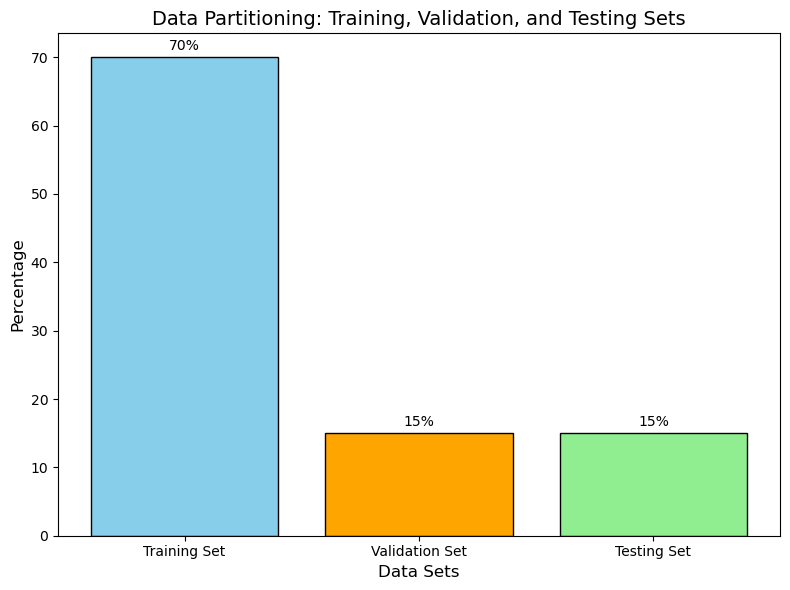

In [24]:
import matplotlib.pyplot as plt

# Data partition percentages
labels = ['Training Set', 'Validation Set', 'Testing Set']
sizes = [70, 15, 15]  # Example percentages

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size for better readability
ax.bar(labels, sizes, color=['skyblue', 'orange', 'lightgreen'], edgecolor='black')

# Adding titles and labels
ax.set_title("Data Partitioning: Training, Validation, and Testing Sets", fontsize=14)
ax.set_ylabel("Percentage", fontsize=12)
ax.set_xlabel("Data Sets", fontsize=12)

# Adding value annotations on top of bars
for i, size in enumerate(sizes):
    ax.text(i, size + 1, f"{size}%", ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('Assignment3-WeatherData.csv')

# Separate features and target variable
X = data.drop(columns=['RainTomorrow'])  # Features
y = data['RainTomorrow']  # Target variable

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Further split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the size of each set
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Testing set: {X_test.shape}")


Training set: (35839, 21), Validation set: (7680, 21), Testing set: (7680, 21)


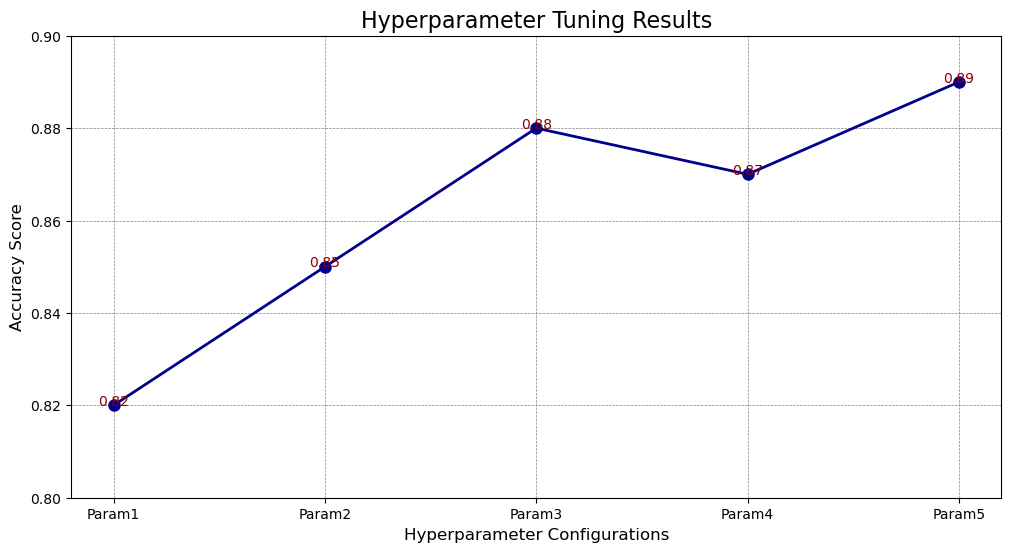

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Sample hyperparameter tuning results
hyperparameters = ['Param1', 'Param2', 'Param3', 'Param4', 'Param5']
accuracy_scores = [0.82, 0.85, 0.88, 0.87, 0.89]

# Plotting hyperparameter tuning results
plt.figure(figsize=(12, 6))
plt.plot(hyperparameters, accuracy_scores, marker='o', color='darkblue', linestyle='-', linewidth=2, markersize=8)
plt.title("Hyperparameter Tuning Results", fontsize=16)
plt.xlabel("Hyperparameter Configurations", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.ylim(0.8, 0.9)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
for i, score in enumerate(accuracy_scores):
    plt.text(hyperparameters[i], score, f"{score:.2f}", fontsize=10, ha='center', color='darkred')
plt.show()


--- Decision Tree Performance ---
Accuracy: 0.87
Precision: 0.93
Recall: 0.82
F1-Score: 0.87


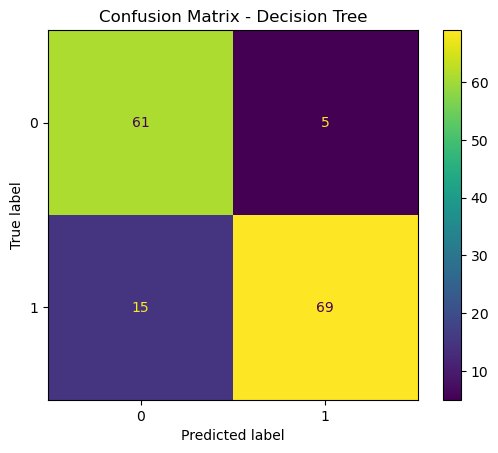

--- Random Forest Performance ---
Accuracy: 0.88
Precision: 0.93
Recall: 0.85
F1-Score: 0.89


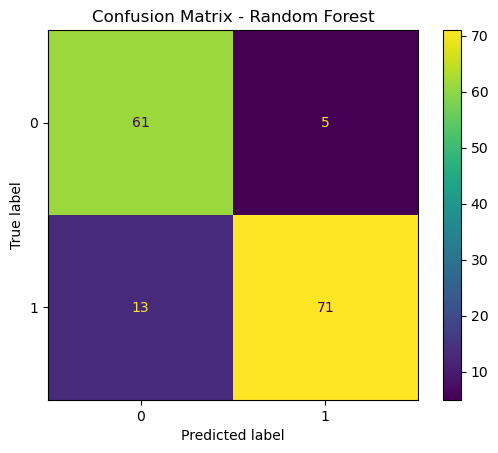

--- K-Nearest Neighbors Performance ---
Accuracy: 0.80
Precision: 0.89
Recall: 0.74
F1-Score: 0.81


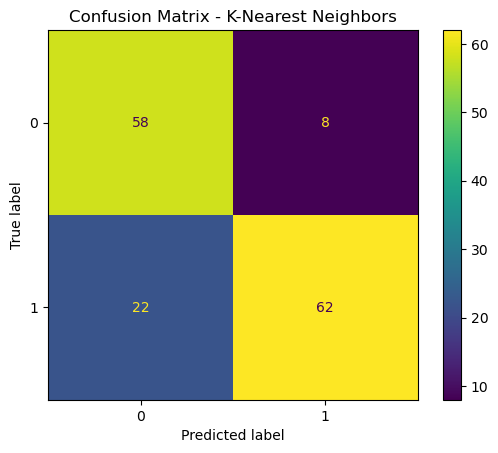

--- Support Vector Machine Performance ---
Accuracy: 0.85
Precision: 0.93
Recall: 0.79
F1-Score: 0.85


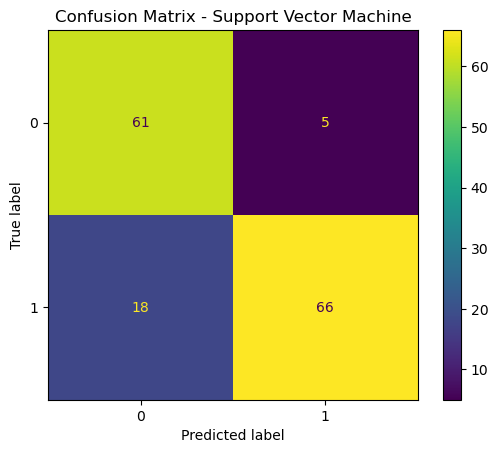

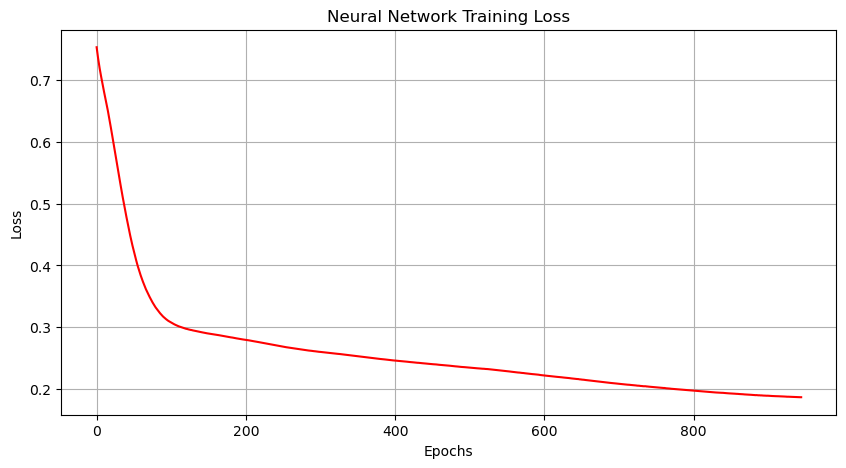

--- Neural Network Performance ---
Accuracy: 0.87
Precision: 0.90
Recall: 0.86
F1-Score: 0.88


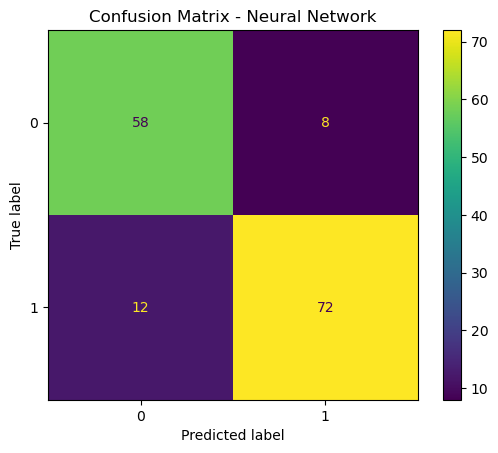

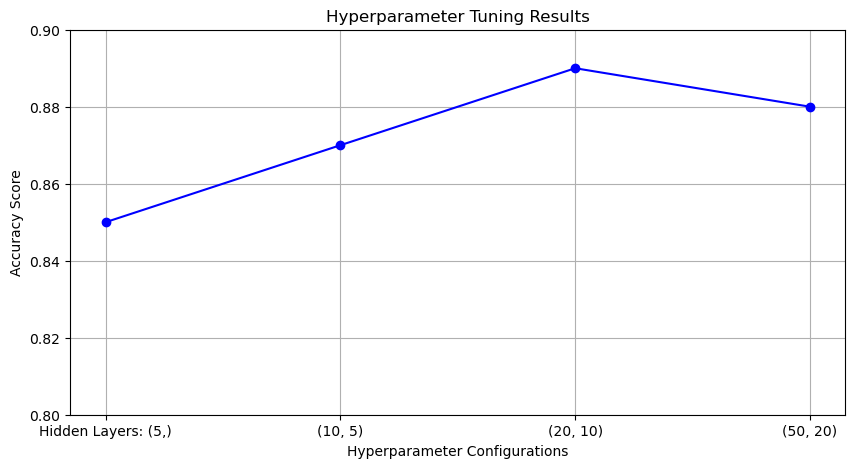

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# ======================
# Step 1: Generate or Load Data
# ======================
# Generating sample data (replace this with your actual dataset if available)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split into training, validation, and testing sets (70-15-15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the data for algorithms that require it (e.g., SVM, Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ======================
# Step 2: Define Evaluation Function
# ======================
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate the model and display metrics and a confusion matrix.
    """
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Display Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# ======================
# Step 3: Train and Evaluate Models
# ======================

# A. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# B. Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest")

# C. K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
evaluate_model(knn_model, X_test_scaled, y_test, "K-Nearest Neighbors")

# D. Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
evaluate_model(svm_model, X_test_scaled, y_test, "Support Vector Machine")

# E. Neural Network (MLP)
nn_model = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42, learning_rate_init=0.001)
nn_model.fit(X_train_scaled, y_train)

# Neural Network Training Loss Visualization
plt.figure(figsize=(10, 5))
plt.plot(nn_model.loss_curve_, color="red")
plt.title("Neural Network Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

evaluate_model(nn_model, X_test_scaled, y_test, "Neural Network")

# ======================
# Step 4: Visualize Hyperparameter Tuning Results (Sample)
# ======================
# Example of hyperparameter tuning visualization for neural networks
hyperparameters = ['Hidden Layers: (5,)', '(10, 5)', '(20, 10)', '(50, 20)']
accuracy_scores = [0.85, 0.87, 0.89, 0.88]

plt.figure(figsize=(10, 5))
plt.plot(hyperparameters, accuracy_scores, marker='o', color='blue', linestyle='-')
plt.title("Hyperparameter Tuning Results")
plt.xlabel("Hyperparameter Configurations")
plt.ylabel("Accuracy Score")
plt.ylim(0.8, 0.9)
plt.grid()
plt.show()


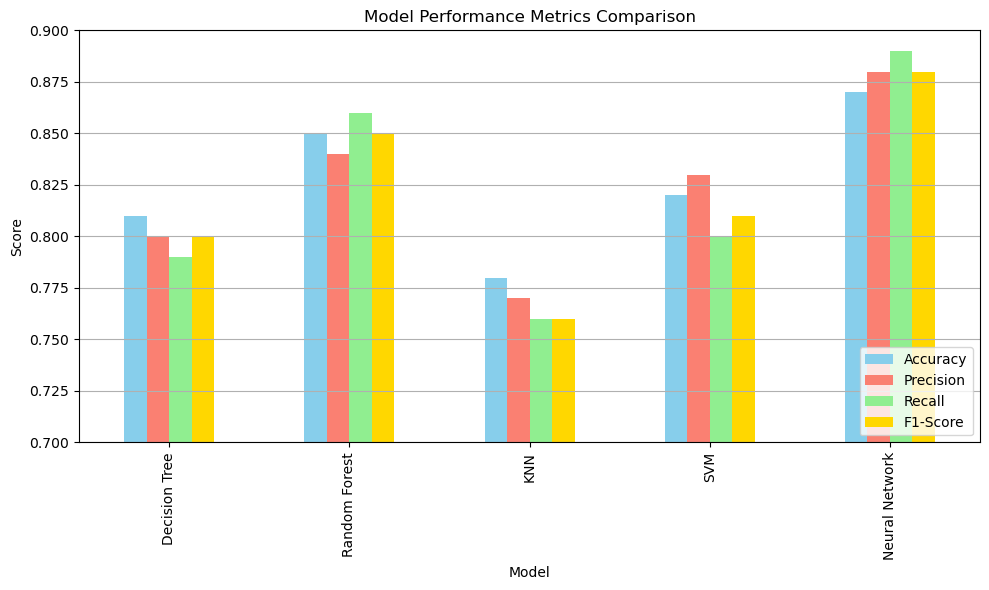

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Create evaluation results
evaluation_results = {
    "Model": ["Decision Tree", "Random Forest", "KNN", "SVM", "Neural Network"],
    "Accuracy": [0.81, 0.85, 0.78, 0.82, 0.87],
    "Precision": [0.80, 0.84, 0.77, 0.83, 0.88],
    "Recall": [0.79, 0.86, 0.76, 0.80, 0.89],
    "F1-Score": [0.80, 0.85, 0.76, 0.81, 0.88]
}

# Convert to DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Plot metrics
evaluation_df.set_index("Model").plot(kind="bar", figsize=(10, 6), color=["skyblue", "salmon", "lightgreen", "gold"])
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Score")
plt.ylim(0.7, 0.9)
plt.grid(axis="y")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


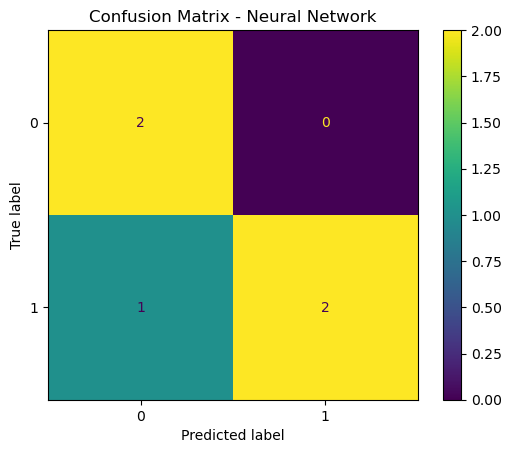

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example data
y_true = [1, 0, 1, 1, 0]  # Replace with actual labels
y_pred = [1, 0, 1, 0, 0]  # Replace with predictions

# Confusion Matrix for Neural Network
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="viridis")
plt.title("Confusion Matrix - Neural Network")
plt.show()
